In [1]:
## Importing libraries, creating dataFrame and reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
##import matplotlib.pyplot as plt

import os

df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


In [2]:
## Droping the unwanted columns

to_drop = ['LOCATION_DESC','PRECINCT','STATISTICAL_MURDER_FLAG','PERP_AGE_GROUP','VIC_SEX','VIC_RACE','X_COORD_CD','Y_COORD_CD'
          ,'Latitude','Longitude','Lon_Lat']

df.drop(to_drop, inplace=True, axis=1)

In [3]:
## Checking if the incident key is unique or not
df['INCIDENT_KEY'].is_unique

False

In [7]:
## Removing all the duplicate entries

df2 = df.drop_duplicates()

In [9]:
## Checking if the incident key is unique or not
df2['INCIDENT_KEY'].is_unique

False

<AxesSubplot:>

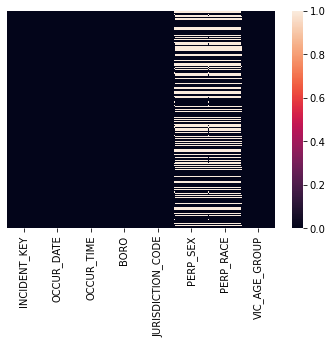

In [10]:
## Anazling NaN values using the heatMap

sns.heatmap(df2.isnull(), yticklabels = False)


In [11]:
## Droping all the entries which contain NaN.

df3= df2.dropna()

<AxesSubplot:>

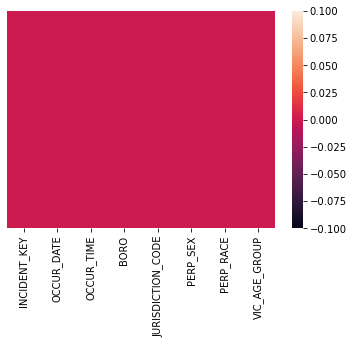

In [12]:
## ReChecking NaN values using the heatMap

sns.heatmap(df3.isnull(), yticklabels = False)

In [13]:
## Droping all the entries in which the column PERP_SEX contains : UNKNOWN.

df3.drop(df3[df3['PERP_RACE'] == 'UNKNOWN'].index, inplace = True)

/Users/shreyasumare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df3

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,PERP_SEX,PERP_RACE,VIC_AGE_GROUP
1,205748546,11/27/2019,15:54:00,BRONX,0.0,M,BLACK,25-44
2,193118596,02/02/2019,19:40:00,MANHATTAN,0.0,M,WHITE HISPANIC,18-24
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,0.0,M,BLACK,25-44
4,201483468,08/22/2019,18:03:00,BRONX,0.0,M,BLACK HISPANIC,18-24
5,198255460,06/07/2019,17:50:00,BROOKLYN,0.0,M,WHITE HISPANIC,25-44
...,...,...,...,...,...,...,...,...
21610,29259599,05/27/2007,15:57:00,BROOKLYN,0.0,M,BLACK,25-44
21611,144479290,07/13/2015,23:40:00,BROOKLYN,0.0,M,BLACK,25-44
21617,26054096,01/02/2007,19:24:00,BROOKLYN,2.0,M,BLACK,25-44
21618,51079993,09/08/2008,16:07:00,MANHATTAN,0.0,M,BLACK,45-64


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,PERP_SEX,PERP_RACE,VIC_AGE_GROUP
1,205748546,11/27/2019,15:54:00,BRONX,0.0,M,BLACK,25-44
2,193118596,02/02/2019,19:40:00,MANHATTAN,0.0,M,WHITE HISPANIC,18-24
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,0.0,M,BLACK,25-44
4,201483468,08/22/2019,18:03:00,BRONX,0.0,M,BLACK HISPANIC,18-24
5,198255460,06/07/2019,17:50:00,BROOKLYN,0.0,M,WHITE HISPANIC,25-44
...,...,...,...,...,...,...,...,...
21612,72732793,05/15/2010,20:52:00,QUEENS,0.0,M,BLACK,25-44
21617,26054096,01/02/2007,19:24:00,BROOKLYN,2.0,M,BLACK,25-44
21618,51079993,09/08/2008,16:07:00,MANHATTAN,0.0,M,BLACK,45-64
21623,63381856,07/04/2009,16:00:00,BROOKLYN,0.0,M,BLACK,25-44


In [10]:
df3.to_csv(r'NYPD_Shooting_Incident_Data__Historic_cleaned.csv')
